# Open Data, Machine Learning e Biblioteche

** seminario a cura di MLOL e Mediatech Group. **
Milano, 7 novembre 2016, Biblioteca Sormani


Marco Goldin : cosa fare con il machine learning in biblioteca

# The future is: import, instantiate, fit, predict/transform


In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from collections import Counter
from scipy import stats
import re
import nltk
from nltk import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


#pd.set_option("display.max_rows",15)
#pd.get_option("display.max_rows")
pd.set_option('display.max_colwidth', -1)

fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 15
fig_size[1] = 11
plt.rcParams["figure.figsize"] = fig_size

#fillna df1['wgt'] = df1['wgt'].fillna(0)

# Comune di Milano - Pagina Facebook e commenti

In [2]:
df_com  = pd.read_csv("153904631400191_facebook_comments.csv",usecols=["status_id","comment_message",
                                                                       "comment_author","comment_likes",
                                                                       "comment_published"],
                     parse_dates=True,index_col='comment_published', infer_datetime_format=True)
df_stat = pd.read_csv("153904631400191_facebook_statuses.csv",usecols=["status_id","status_message",
                                                                       "link_name","status_type","status_link",
                                                                       "num_reactions","num_comments",
                                                                       "num_shares","status_published"])

# Commenti estratti al 5 novembre 2016
** 127.418 **

In [3]:
df_com.describe()

,comment_likes
count,127418.000000
mean,1.714185
std,5.375637
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,339.000000


# Facebook post estratti al 5 novembre 2016
** 5197 **

In [4]:
df_stat.describe()

,num_reactions,num_comments,num_shares
count,5197.000000,5197.000000,5197.000000
mean,195.038676,15.919954,89.474889
std,680.454109,30.449654,263.815365
min,0.000000,0.000000,0.000000
25%,38.000000,2.000000,8.000000
50%,83.000000,7.000000,30.000000
75%,196.000000,18.000000,81.000000
max,41391.000000,559.000000,6763.000000


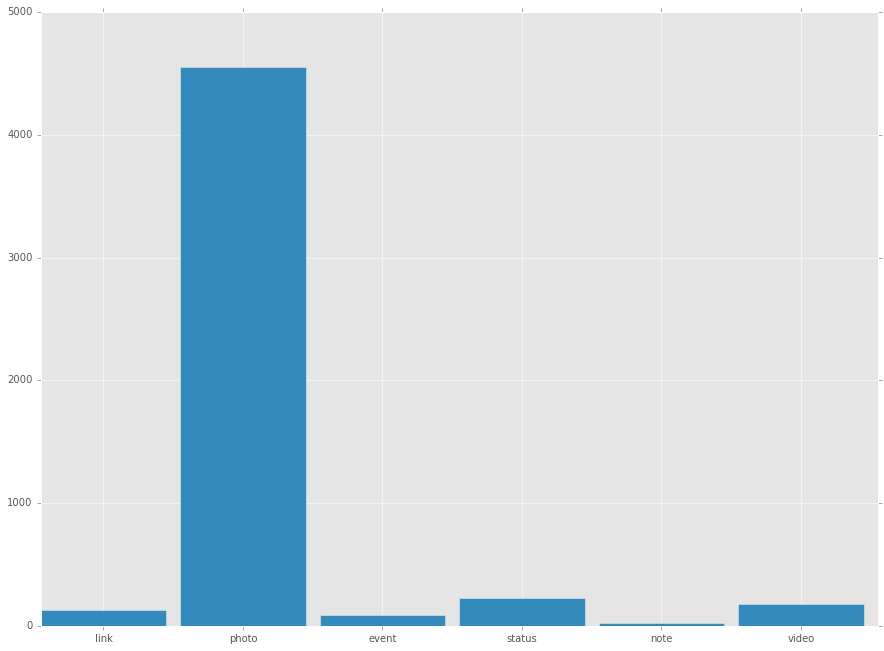

In [5]:
counter_type = Counter(df_stat['status_type'])
df_stat_ptype = counter_type.keys()
df_stat_ptype_counts = counter_type.values()


indexes = np.arange(len(df_stat_ptype))
width = 0.9
plt.bar(indexes, df_stat_ptype_counts, width)
plt.xticks(indexes + width * 0.5, df_stat_ptype)
plt.show()

In [6]:
counter_type

Counter({'event': 88,
         'link': 130,
         'note': 19,
         'photo': 4553,
         'status': 226,
         'video': 181})

# Ordinamento dei commenti per numero di like

In [7]:
comm_sorted = df_com.sort_values('comment_likes', ascending=False)

In [8]:
comm_sorted.describe()

,comment_likes
count,127418.000000
mean,1.714185
std,5.375637
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,339.000000


In [9]:
comm_sorted.head()

,status_id,comment_message,comment_author,comment_likes
comment_published,,,,
2016-06-21 10:36:29,153904631400191_361427137314605,Grazie per averci restituito la città rendendola bella. Per la prima volta in tanti anni si sente dire che Milano è magnifica!,Chiara Antola,339
2015-05-12 10:38:03,153904631400191_293639020760084,Chi glielo dice a salvini che non sono stati i rom?,Ivan Badolato,274
2015-05-12 10:24:39,153904631400191_293639020760084,"Oddio, una è la mia!! Non ci credo, ho denucia e foto! Errata corrige dopo essermi recata al comando: era una bici 'sorella' ma non la mia :-(",Alessia Saro,262
2016-06-21 11:01:03,153904631400191_361427137314605,"Sig. Sindaco,alle precedenti comunali non l'ho votata ed anche se su alcune tematiche non mi ha trovato d'accordo,mi sento comunque in dovere di farle i miei complimenti per essere riuscito a rendere Milano ancora grande. È una persona educata,dalla faccia""pulita"",è un vero milanese. Le avrei accordato in questa tornata il mio voto nel caso si fosse ricandidato,sicuro che avrebbe trovato il modo per cominciare ad occuparsi in maniera più decisa delle nostre periferie. Capisco che l'EXPO le abbia portato grandi pressioni e c'era l'obbligo morale di rendere la nostra Milano pronta all'accoglienza di così tanti fruitori dell'evento,ma come accennavo all'inizio si sarebbe potuto far di più anche per i ceti meno abbienti. La voglio ringraziare perché è stato il Sindaco di tutti senza eccezioni(questo il mio personale sentire),anche per chi come me è orientato,politicamente parlando,da tutt'altra parte.\nArrivederci Sindaco,ciao Giuliano da un cittadino orgoglioso sempre della nostra Milano",Matteo Lama,247
2015-04-09 03:28:19,153904631400191_290068181117168,"Continuate pure a lametarvi. Poi quando vincerà la destra sarete tutti contenti. Città aperta alle auto, metro allo sfascio, inquinamento e tutti contenti di potersi esibire al volante e parcheggiare in terza fila. Ve lo meritate Salvini. Poi ti chiedi perché Pisapia è stanco e non si ricandida...",Luca Piccirilli,222


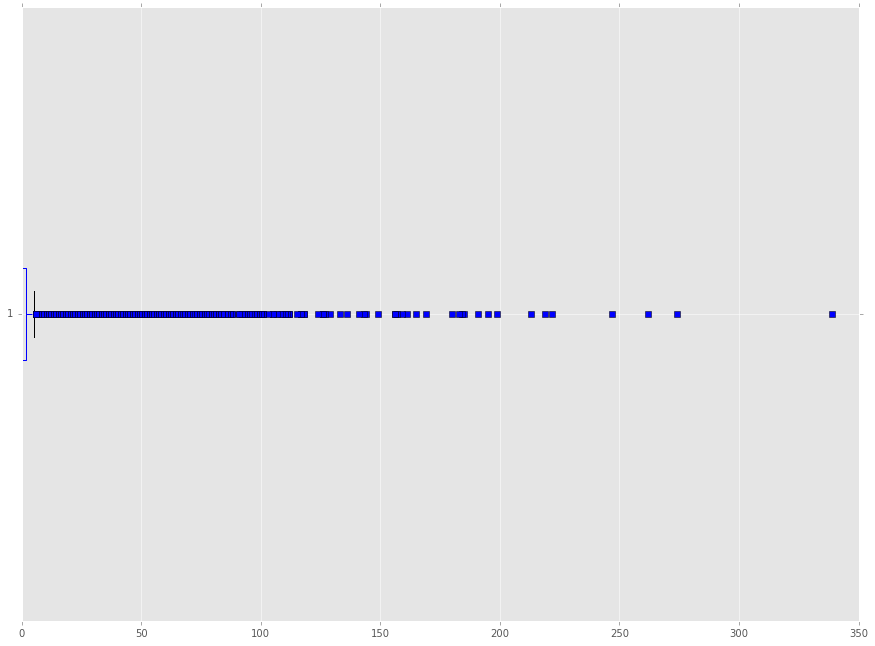

In [10]:
likes = comm_sorted['comment_likes']
plt.boxplot(likes, 0, 'rs', 0)
plt.show()

(array([  1.80560000e+04,   6.26900000e+03,   4.63300000e+03,
          2.20700000e+03,   1.17800000e+03,   4.18000000e+02,
          1.60000000e+02,   8.60000000e+01,   2.50000000e+01,
          7.00000000e+00]),
 array([ 0.69314718,  1.20643247,  1.71971777,  2.23300306,  2.74628835,
         3.25957364,  3.77285894,  4.28614423,  4.79942952,  5.31271481,
         5.82600011]),
 <a list of 10 Patch objects>)

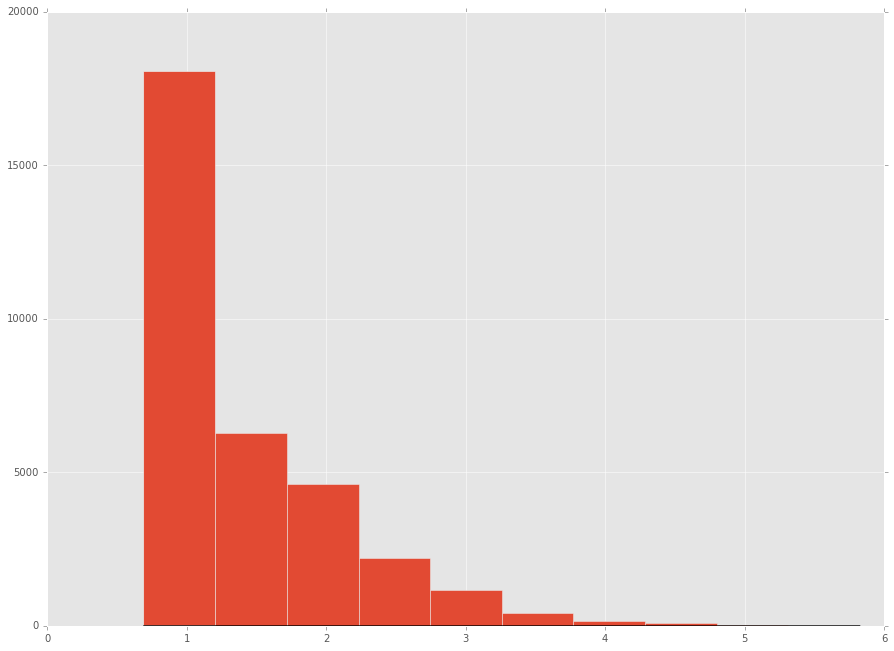

In [11]:
comm_sorted_log = comm_sorted[comm_sorted.comment_likes > 1]
engage_log = np.log(comm_sorted_log['comment_likes'])
engage_log_new = stats.norm.pdf(engage_log, np.mean(engage_log), np.std(engage_log))

plt.plot(engage_log, engage_log_new, '-0')

plt.hist(engage_log)

# Filtriamo i commenti in base all'apprezzamento

In [12]:
comm_sorted2 = comm_sorted[comm_sorted.comment_likes > 10]

#df = df[df.name != 'Tina']

In [13]:
comm_sorted2.describe()

,comment_likes
count,3546.000000
mean,22.726452
std,21.732368
min,11.000000
25%,13.000000
50%,16.000000
75%,23.750000
max,339.000000


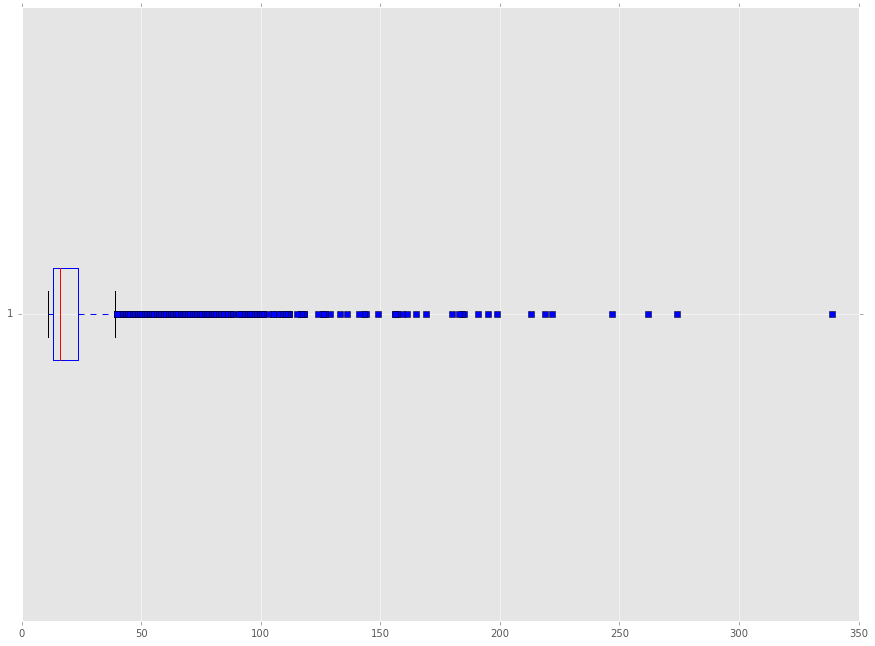

In [14]:
new_likes = comm_sorted2['comment_likes']
plt.boxplot(new_likes, 0, 'rs', 0)
plt.show()

(array([ 1672.,   826.,   495.,   275.,   124.,    81.,    41.,    18.,
           10.,     4.]),
 array([ 2.39789527,  2.74070576,  3.08351624,  3.42632672,  3.76913721,
         4.11194769,  4.45475817,  4.79756866,  5.14037914,  5.48318962,
         5.82600011]),
 <a list of 10 Patch objects>)

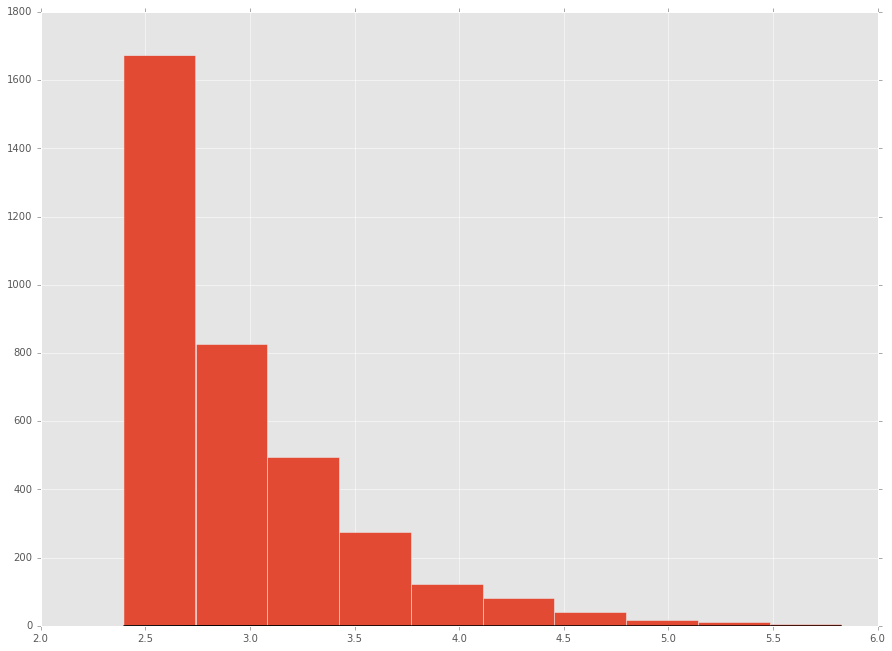

In [15]:
engage_log2 = np.log(comm_sorted2['comment_likes'])
engage_log_new2 = stats.norm.pdf(engage_log2, np.mean(engage_log2), np.std(engage_log2))

plt.plot(engage_log2, engage_log_new2, '-0')

plt.hist(engage_log2)

In [16]:
comm_sorted2.head()

,status_id,comment_message,comment_author,comment_likes
comment_published,,,,
2016-06-21 10:36:29,153904631400191_361427137314605,Grazie per averci restituito la città rendendola bella. Per la prima volta in tanti anni si sente dire che Milano è magnifica!,Chiara Antola,339
2015-05-12 10:38:03,153904631400191_293639020760084,Chi glielo dice a salvini che non sono stati i rom?,Ivan Badolato,274
2015-05-12 10:24:39,153904631400191_293639020760084,"Oddio, una è la mia!! Non ci credo, ho denucia e foto! Errata corrige dopo essermi recata al comando: era una bici 'sorella' ma non la mia :-(",Alessia Saro,262
2016-06-21 11:01:03,153904631400191_361427137314605,"Sig. Sindaco,alle precedenti comunali non l'ho votata ed anche se su alcune tematiche non mi ha trovato d'accordo,mi sento comunque in dovere di farle i miei complimenti per essere riuscito a rendere Milano ancora grande. È una persona educata,dalla faccia""pulita"",è un vero milanese. Le avrei accordato in questa tornata il mio voto nel caso si fosse ricandidato,sicuro che avrebbe trovato il modo per cominciare ad occuparsi in maniera più decisa delle nostre periferie. Capisco che l'EXPO le abbia portato grandi pressioni e c'era l'obbligo morale di rendere la nostra Milano pronta all'accoglienza di così tanti fruitori dell'evento,ma come accennavo all'inizio si sarebbe potuto far di più anche per i ceti meno abbienti. La voglio ringraziare perché è stato il Sindaco di tutti senza eccezioni(questo il mio personale sentire),anche per chi come me è orientato,politicamente parlando,da tutt'altra parte.\nArrivederci Sindaco,ciao Giuliano da un cittadino orgoglioso sempre della nostra Milano",Matteo Lama,247
2015-04-09 03:28:19,153904631400191_290068181117168,"Continuate pure a lametarvi. Poi quando vincerà la destra sarete tutti contenti. Città aperta alle auto, metro allo sfascio, inquinamento e tutti contenti di potersi esibire al volante e parcheggiare in terza fila. Ve lo meritate Salvini. Poi ti chiedi perché Pisapia è stanco e non si ricandida...",Luca Piccirilli,222


# Pulizia del testo per la semantica computazionale

In [17]:
comm_sorted2.comment_message = comm_sorted2.comment_message.apply(lambda s: re.sub("\n", " ", s))
comm_sorted2.comment_message = comm_sorted2.comment_message.apply(lambda s: re.sub('|', '', s))

# Remove multiple spaces
comm_sorted2.comment_message = comm_sorted2.comment_message.apply(lambda s: re.sub(' +', ' ', s))
comm_sorted2.comment_message = comm_sorted2.comment_message.apply(lambda s: re.sub(' +', ' ', s))

# Remove leading and trailing spaces
comm_sorted2.comment_message = comm_sorted2.comment_message.apply(lambda t: t.strip())

/home/inmediaref/anaconda3/envs/minimongo/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [18]:
comm_sorted2.head()

,status_id,comment_message,comment_author,comment_likes
comment_published,,,,
2016-06-21 10:36:29,153904631400191_361427137314605,Grazie per averci restituito la città rendendola bella. Per la prima volta in tanti anni si sente dire che Milano è magnifica!,Chiara Antola,339
2015-05-12 10:38:03,153904631400191_293639020760084,Chi glielo dice a salvini che non sono stati i rom?,Ivan Badolato,274
2015-05-12 10:24:39,153904631400191_293639020760084,"Oddio, una è la mia!! Non ci credo, ho denucia e foto! Errata corrige dopo essermi recata al comando: era una bici 'sorella' ma non la mia :-(",Alessia Saro,262
2016-06-21 11:01:03,153904631400191_361427137314605,"Sig. Sindaco,alle precedenti comunali non l'ho votata ed anche se su alcune tematiche non mi ha trovato d'accordo,mi sento comunque in dovere di farle i miei complimenti per essere riuscito a rendere Milano ancora grande. È una persona educata,dalla faccia""pulita"",è un vero milanese. Le avrei accordato in questa tornata il mio voto nel caso si fosse ricandidato,sicuro che avrebbe trovato il modo per cominciare ad occuparsi in maniera più decisa delle nostre periferie. Capisco che l'EXPO le abbia portato grandi pressioni e c'era l'obbligo morale di rendere la nostra Milano pronta all'accoglienza di così tanti fruitori dell'evento,ma come accennavo all'inizio si sarebbe potuto far di più anche per i ceti meno abbienti. La voglio ringraziare perché è stato il Sindaco di tutti senza eccezioni(questo il mio personale sentire),anche per chi come me è orientato,politicamente parlando,da tutt'altra parte. Arrivederci Sindaco,ciao Giuliano da un cittadino orgoglioso sempre della nostra Milano",Matteo Lama,247
2015-04-09 03:28:19,153904631400191_290068181117168,"Continuate pure a lametarvi. Poi quando vincerà la destra sarete tutti contenti. Città aperta alle auto, metro allo sfascio, inquinamento e tutti contenti di potersi esibire al volante e parcheggiare in terza fila. Ve lo meritate Salvini. Poi ti chiedi perché Pisapia è stanco e non si ricandida...",Luca Piccirilli,222


In [19]:
word_bag = comm_sorted2.comment_message.apply(lambda t: t + " ").sum()

In [20]:
Counter(word_bag.split()).most_common()[:10]

[('di', 4523),
 ('che', 3324),
 ('e', 3296),
 ('a', 2271),
 ('non', 2064),
 ('la', 2038),
 ('il', 1985),
 ('per', 1942),
 ('in', 1854),
 ('è', 1528)]

In [21]:
stopwords = [word for word in nltk.corpus.stopwords.words('italian')]

In [22]:
comment_words = [word for word in word_bag.split() if word.lower() not in stopwords]

In [23]:
Counter(comment_words).most_common()[:20]

[('Milano', 569),
 ('città', 380),
 ('solo', 322),
 ('fare', 299),
 ('essere', 274),
 ('sempre', 265),
 ('Ciao', 224),
 ('anni', 220),
 ('Comune', 215),
 ('quando', 211),
 ('cosa', 208),
 ('senza', 195),
 ('fatto', 194),
 ('stato', 185),
 ('prima', 170),
 ('[[PHOTO]]', 165),
 ('ogni', 160),
 ('molto', 160),
 ('persone', 158),
 ('mai', 158)]

In [24]:
bigrammi = nltk.collocations.BigramAssocMeasures()
bigram_finder = nltk.collocations.BigramCollocationFinder.from_words(comment_words)

# Filter to only bigrams that appear 20+ times
bigram_finder.apply_freq_filter(5)

bigram_finder.score_ngrams(bigrammi.raw_freq)[:50]

[(('Comune', 'Milano'), 0.0010955693138678692),
 (('Milano', '|'), 0.0006114805472750898),
 (('|', 'Palazzo'), 0.0006114805472750898),
 (('Palazzo', 'Marino'), 0.0005477846569339346),
 (('mezzi', 'pubblici'), 0.0003694361639787001),
 (('comune', 'Milano'), 0.00028026191750108283),
 (('deve', 'essere'), 0.00021656602715992764),
 (('piste', 'ciclabili'), 0.00021656602715992764),
 (('stato', 'fatto'), 0.00021656602715992764),
 (('maggior', 'parte'), 0.0002038268490916966),
 (('può', 'essere'), 0.0002038268490916966),
 (('anni', 'fa'), 0.00019108767102346557),
 (('ogni', 'giorno'), 0.00019108767102346557),
 (('5', 'anni'), 0.00017834849295523454),
 (('città', 'Milano'), 0.00017834849295523454),
 (('punto', 'vista'), 0.00017834849295523454),
 (('ogni', 'volta'), 0.00016560931488700348),
 (('Milano', 'città'), 0.00015287013681877245),
 (('Milano', 'sempre'), 0.00015287013681877245),
 (('fare', 'qualcosa'), 0.00015287013681877245),
 (('mai', 'bene'), 0.00015287013681877245),
 (('Polizia', 'lo

In [25]:
# Top 10 bigrams with the highest PMI (pointwise mutual information)
bigram_finder.nbest(bigrammi.pmi, 20)

[('Simply', 'Market'),
 ("dell'ecomostro", 'Ponte'),
 ('·', 'Simply'),
 ('scale', 'mobili'),
 ('Lucia', 'De'),
 ('Pierfrancesco', 'Majorino:'),
 ('abbonamento', 'annuale'),
 ('forze', "dell'ordine"),
 ('New', 'York'),
 ('secolo', 'd.C.'),
 ('ah', 'ah'),
 ('Buona', 'serata'),
 ('latte', 'polvere'),
 ("l'aria", 'condizionata'),
 ('car', 'sharing'),
 ('Stazione', 'Centrale'),
 ('Polizia', 'locale'),
 ('Fondazione', 'Pier'),
 ('Parco', 'Sempione'),
 ('rete', 'teleriscaldamento')]

# Sistema Bibliotecario Milano @sbm.Milano

In [27]:
bib_commenti = pd.read_csv("1380755462233809_facebook_comments.csv",usecols=["status_id","comment_message",
                                                                       "comment_author","comment_likes",
                                                                       "comment_published"],
                     parse_dates=True,index_col='comment_published', infer_datetime_format=True)

In [28]:
bib_status  = pd.read_csv("1380755462233809_facebook_statuses.csv")

In [29]:
bib_status_sorted = bib_commenti.sort_values('comment_likes', ascending=False)


In [30]:
bib_status_sorted.describe()

,comment_likes
count,525.000000
mean,0.396190
std,0.761167
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,6.000000


In [31]:
bib_status_sorted.comment_message = bib_status_sorted.comment_message.apply(lambda s: re.sub("\n", " ", s))
bib_status_sorted.comment_message = bib_status_sorted.comment_message .apply(lambda s: re.sub('|', '', s))

# Remove multiple spaces
bib_status_sorted.comment_message = bib_status_sorted.comment_message.apply(lambda s: re.sub(' +', ' ', s))
bib_status_sorted.comment_message = bib_status_sorted.comment_message.apply(lambda s: re.sub(' +', ' ', s))

# Remove leading and trailing spaces
bib_status_sorted.comment_message = bib_status_sorted.comment_message.apply(lambda t: t.strip())

In [32]:
bib_status_sorted.head()

,status_id,comment_message,comment_author,comment_likes
comment_published,,,,
2015-05-20 08:33:18,1380755462233809_1431316587177696,"È indecente! È stata chiusa 3 mesi la biblioteca per ristrutturazioni e dopo 2 giorni i bagni (uno dei lavori più importanti fatti nel periodo) sono guasti. Complimenti per il lavoro di qualità, un servizio statale facesse schifo sarebbe meglio di così",Leonardo Rezzonico,6
2015-08-26 14:49:58,1380755462233809_1459450827697605,Un vero guaio. Ma siamo già al lavoro per restituirla al più presto ai milanesi.,Stefano Parise,6
2015-05-20 09:01:01,1380755462233809_1431316587177696,"Complimenti! 3 mesi per imbiancare, rifare 2 controsoffitti (ristrutturazioni ""essenziali ed utilissime""... se non si fosse capito sono ironico) e 2 metri quadri di bagni e dopo 3 giorni di attività siamo tornati alla medesima situazione di prima! Non solo: mi sarei aspettato che in tutto questo tempo di chiusura venisse sistemato l'impianto di riscaldamento e condizionamento, e invece niente... se da un lato sono contento perchè, vista la qualità dei lavori appena fatti, probabilmente dopo una settimana si sarebbe nuovamente rotto anche quello, dall'altro rimango dell'idea che la sistemazione del suddetto impianto rimanga un miraggio e saremo destinati a morire di caldo in estate e a studiare in giubbotto in inverno per ancora molto tempo a venire. VERGOGNA!",Giulio Pezzi,6
2016-10-11 14:39:24,1380755462233809_1590454127930607,"Bellissima mostra e bellissima serata inaugurale, grazie",Gabriella Persiani,3
2016-03-25 13:07:36,1380755462233809_1522159184760102,Auguri a tutti i bibliotecari e agli operatori delle biblio t.milanesi,Alessandra Quaini,3


In [33]:
#comm_sorted2 + bib_status_sorted

# Uniamo i due data frame commenti Comune + commenti Biblioteche

In [36]:
commenti_uniti = pd.read_csv("commenti_uniti.csv",usecols=["status_id","comment_message",
                                                                       "comment_author","comment_likes",
                                                                       "comment_published"],
                     parse_dates=True,index_col='comment_published', infer_datetime_format=True)

In [37]:
commenti_uniti.describe()

,comment_likes
count,4071.000000
mean,19.846721
std,21.621142
min,0.000000
25%,11.000000
50%,15.000000
75%,22.000000
max,339.000000


In [38]:
commenti_uniti.sort_index(axis=0, ascending=False, inplace=True)

In [72]:
commenti_uniti.head(3)

,status_id,comment_message,comment_author,comment_likes
comment_published,,,,
2016-11-05 08:25:46,1380755462233809_1599781846997835,Concordo 👏🏻👏🏻👏🏻,Sara Zanni,0
2016-11-05 06:18:23,1380755462233809_1599781846997835,"Foscolo ""I sepolcri""",Valentina Azzarone,0
2016-11-04 09:20:45,153904631400191_406076822849636,"un obbrobbrio che spero trovi validi oppositori. le vie e le piazze delle città hanno nomi derivati dalla Storia. Accostarli a prodotti di consumo, magari pure scadenti o di sinistri proprietari è cosa che nemmeno i peggiori trogloditi avrebbero fatto. Contrario!!",Ivan Vettriano,11


In [40]:
word_bag_commenti = commenti_uniti.comment_message.apply(lambda t: t + " ").sum()

In [41]:
Counter(word_bag_commenti.split()).most_common()[:10]

[('di', 4761),
 ('e', 3454),
 ('che', 3422),
 ('a', 2345),
 ('la', 2142),
 ('non', 2112),
 ('il', 2058),
 ('per', 2017),
 ('in', 1929),
 ('è', 1592)]

In [42]:
#stopwords = [word for word in nltk.corpus.stopwords.words('italian')]

In [43]:
comment_words = [word for word in word_bag_commenti.split() if word.lower() not in stopwords]

In [44]:
Counter(comment_words).most_common()[:50]

[('Milano', 580),
 ('città', 383),
 ('solo', 331),
 ('fare', 303),
 ('essere', 278),
 ('sempre', 276),
 ('Ciao', 224),
 ('anni', 224),
 ('quando', 219),
 ('Comune', 216),
 ('cosa', 215),
 ('senza', 202),
 ('fatto', 199),
 ('stato', 189),
 ('prima', 182),
 ('[[PHOTO]]', 175),
 ('molto', 172),
 ('ancora', 164),
 ('mai', 164),
 ('fa', 163),
 ('poi', 161),
 ('ogni', 161),
 ('persone', 160),
 ("c'è", 160),
 ('via', 153),
 ('così', 146),
 ('-', 146),
 ('già', 144),
 ('Grazie', 136),
 ('progetto', 129),
 ('proprio', 125),
 ('lavoro', 124),
 ('può', 122),
 ('invece', 121),
 ('parte', 121),
 ('comune', 120),
 ('cittadini', 120),
 ('grazie', 118),
 ('mezzi', 115),
 ('meno', 111),
 (',', 110),
 ('altri', 110),
 ('gente', 109),
 ('dopo', 107),
 ('bene', 106),
 ('stata', 106),
 ('casa', 106),
 ('piazza', 102),
 ('due', 101),
 ('ora', 100)]

In [45]:
bigrammi_comm = nltk.collocations.BigramAssocMeasures()
bigram_finder_comm = nltk.collocations.BigramCollocationFinder.from_words(comment_words)

# Filter to only bigrams that appear 5+ times
bigram_finder_comm.apply_freq_filter(5)

bigram_finder_comm.score_ngrams(bigrammi_comm.raw_freq)[:50]

[(('Comune', 'Milano'), 0.0010546605084191002),
 (('Milano', '|'), 0.0005818816598174347),
 (('|', 'Palazzo'), 0.0005818816598174347),
 (('Palazzo', 'Marino'), 0.0005212689869197852),
 (('mezzi', 'pubblici'), 0.00035155350280636675),
 (('comune', 'Milano'), 0.00026669576074965756),
 (('deve', 'essere'), 0.0002060830878520081),
 (('piste', 'ciclabili'), 0.0002060830878520081),
 (('stato', 'fatto'), 0.0002060830878520081),
 (('maggior', 'parte'), 0.0001939605532724782),
 (('può', 'essere'), 0.0001939605532724782),
 (('anni', 'fa'), 0.00018183801869294832),
 (('città', 'Milano'), 0.00018183801869294832),
 (('ogni', 'giorno'), 0.00018183801869294832),
 (('5', 'anni'), 0.00016971548411341843),
 (('Maria', 'Luisa'), 0.00016971548411341843),
 (('punto', 'vista'), 0.00016971548411341843),
 (('ogni', 'volta'), 0.00015759294953388855),
 (('Milano', 'città'), 0.00014547041495435866),
 (('Milano', 'sempre'), 0.00014547041495435866),
 (('fare', 'qualcosa'), 0.00014547041495435866),
 (('mai', 'bene'

In [46]:
# Top bigrammi con più alta PMI (pointwise mutual information)
bigram_finder_comm.nbest(bigrammi_comm.pmi, 50)

[('Sistema', 'Bibliotecario'),
 ('Simply', 'Market'),
 ("dell'ecomostro", 'Ponte'),
 ('·', 'Simply'),
 ('scale', 'mobili'),
 ('Pierfrancesco', 'Majorino:'),
 ('abbonamento', 'annuale'),
 ('forze', "dell'ordine"),
 ('New', 'York'),
 ('secolo', 'd.C.'),
 ('Lucia', 'De'),
 ('Maria', 'Luisa'),
 ('ah', 'ah'),
 ('latte', 'polvere'),
 ('Buona', 'serata'),
 ("l'aria", 'condizionata'),
 ('car', 'sharing'),
 ('Stazione', 'Centrale'),
 ('Polizia', 'locale'),
 ('Fondazione', 'Pier'),
 ('risposta', 'esatta!'),
 ('rete', 'teleriscaldamento'),
 ('Parco', 'Sempione'),
 ('Regione', 'Lombardia'),
 ('bike', 'sharing'),
 ('centri', 'sociali'),
 ('pista', 'ciclabile'),
 ('rendete', 'conto'),
 ('energetica', 'edifici'),
 ('San', 'Siro'),
 ('San', 'Babila'),
 ('raccolta', 'differenziata'),
 ('biblioteca', 'Sormani'),
 ('nuovi', 'alberi.'),
 ('dir', 'poco'),
 ('piste', 'ciclabili'),
 ('protezione', 'civile'),
 ('spazi', 'verdi'),
 ('mobilità', 'sostenibile'),
 ('mobilità', 'sostenibile.'),
 ('maggiori', 'info

# Machine Learning training in base al vocabolario ottenuto

In [47]:
#usiamo i bigrammi ottenuti con commment_words come set di dati per allenare il modello
simple_train = ['Biblioteca Alberi', 'anidride carbonica', 'cinta muraria','esercizi commerciali',
                'scale mobili','abbonamento annuale','forze dell\'ordine','gioco d\'azzardo',
               'car sharing','Stazione Centrale','piste ciclabili','Polizia locale',
                'strisce pedonali','Parco Sempione','Regione Lombardia','bike sharing','Raccolta differenziata',
               'mobilità sostenibile','trasporto pubblico','maggiori informazioni','costo zero']


In [48]:
# importiamo e inizializziamo CountVectorizer (parametri default)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [49]:
# Impara il vocabolario dei dati immessi
vect.fit(simple_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [50]:
# Esaminiamo il vocabolario così ottenuto
vect.get_feature_names()

['abbonamento',
 'alberi',
 'anidride',
 'annuale',
 'azzardo',
 'biblioteca',
 'bike',
 'car',
 'carbonica',
 'centrale',
 'ciclabili',
 'cinta',
 'commerciali',
 'costo',
 'dell',
 'differenziata',
 'esercizi',
 'forze',
 'gioco',
 'informazioni',
 'locale',
 'lombardia',
 'maggiori',
 'mobili',
 'mobilità',
 'muraria',
 'ordine',
 'parco',
 'pedonali',
 'piste',
 'polizia',
 'pubblico',
 'raccolta',
 'regione',
 'scale',
 'sempione',
 'sharing',
 'sostenibile',
 'stazione',
 'strisce',
 'trasporto',
 'zero']

In [51]:
# Trasformiamo i dati in una 'document-term matrix'
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<21x42 sparse matrix of type '<class 'numpy.int64'>'
	with 43 stored elements in Compressed Sparse Row format>

In [52]:
# Convertiamo da sparse matrix a dense matrix
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

In [53]:
# Esaminiamo insieme il vocabolario e la dense matrix
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())

,abbonamento,alberi,anidride,annuale,azzardo,biblioteca,bike,car,carbonica,centrale,...,raccolta,regione,scale,sempione,sharing,sostenibile,stazione,strisce,trasporto,zero
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [54]:
# check the type of the document-term matrix
type(simple_train_dtm)

scipy.sparse.csr.csr_matrix

In [55]:
# examine the sparse matrix contents
print(simple_train_dtm)

  (0, 1)	1
  (0, 5)	1
  (1, 2)	1
  (1, 8)	1
  (2, 11)	1
  (2, 25)	1
  (3, 12)	1
  (3, 16)	1
  (4, 23)	1
  (4, 34)	1
  (5, 0)	1
  (5, 3)	1
  (6, 14)	1
  (6, 17)	1
  (6, 26)	1
  (7, 4)	1
  (7, 18)	1
  (8, 7)	1
  (8, 36)	1
  (9, 9)	1
  (9, 38)	1
  (10, 10)	1
  (10, 29)	1
  (11, 20)	1
  (11, 30)	1
  (12, 28)	1
  (12, 39)	1
  (13, 27)	1
  (13, 35)	1
  (14, 21)	1
  (14, 33)	1
  (15, 6)	1
  (15, 36)	1
  (16, 15)	1
  (16, 32)	1
  (17, 24)	1
  (17, 37)	1
  (18, 31)	1
  (18, 40)	1
  (19, 19)	1
  (19, 22)	1
  (20, 13)	1
  (20, 41)	1


In [73]:
# esempio per il test del modello
simple_test = ["volevo chiedere informazioni sulla biblioteca"]

# Bonus content...

# Pagine Facebook "Milano"

estrazione, analisi e classificazione delle categorie di interesse delle pagine facebook estratte con una ricerca comprendente "Milano" nel nome delle pagina

In [59]:
gh = pd.read_csv("search_page_2016_11_05_12_46_55-tab.csv",encoding='utf-8')

In [60]:
gh.dtypes

id                     int64 
name                   object
category               object
fan_count              int64 
checkins               int64 
talking_about_count    int64 
description            object
cover                  object
link                   object
website                object
dtype: object

In [61]:
gh.columns

Index(['id', 'name', 'category', 'fan_count', 'checkins',
       'talking_about_count', 'description', 'cover', 'link', 'website'],
      dtype='object')

In [62]:
gh['id'] = gh['id'].astype('int64')
gh['fan_count'] = gh['fan_count'].astype('int64')
gh['checkins'] = gh['checkins'].astype('int64')
gh['talking_about_count'] = gh['talking_about_count'].astype('int64')


In [63]:
gh.dtypes

id                     int64 
name                   object
category               object
fan_count              int64 
checkins               int64 
talking_about_count    int64 
description            object
cover                  object
link                   object
website                object
dtype: object

In [64]:
gh.columns

Index(['id', 'name', 'category', 'fan_count', 'checkins',
       'talking_about_count', 'description', 'cover', 'link', 'website'],
      dtype='object')

In [65]:
gh.head(2)

,id,name,category,fan_count,checkins,talking_about_count,description,cover,link,website
0,237513696303282,Milano Centrale,Company,62617,679683,3455,NaN,"<img src=""https://scontent.xx.fbcdn.net/v/t1.0-9/s720x720/14606478_1135007349887241_3197498013491166929_n.png?oh=84295ec52f1acf7bb83f1abfe03bbabc&oe=58D5B06B"" width=""120"" />",https://www.facebook.com/Milano-Centrale-237513696303282/,www.milanocentrale.it
1,43375072153,Piccolo Teatro Milano,Attractions/Things to Do,147698,17390,5014,NaN,"<img src=""https://scontent.xx.fbcdn.net/v/t1.0-9/s720x720/14908316_10154627558197154_1898559072520357297_n.png?oh=1268219160e0ebe9865c9aa5006961a7&oe=588BA7B0"" width=""120"" />",https://www.facebook.com/PiccoloTeatro/,www.piccoloteatro.org www.piccoloteatro.tv


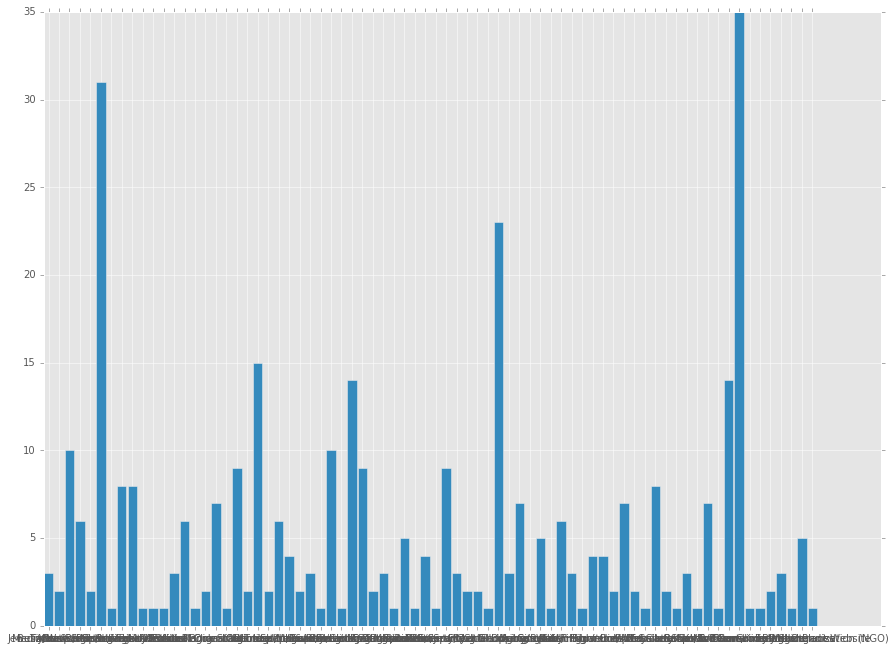

In [66]:
counter = Counter(gh['category'])
gh_ptype = counter.keys()
gh_ptype_counts = counter.values()

# Plot histogram using matplotlib bar().
indexes = np.arange(len(gh_ptype))
width = 0.9
plt.bar(indexes, gh_ptype_counts, width)
plt.xticks(indexes + width * 0.5, gh_ptype)
plt.show()

In [67]:
gh_unici = gh["category"].unique()
len(gh_unici)

74

In [68]:
counter

Counter({'Amateur Sports Team': 2,
         'Artist': 3,
         'Arts & Entertainment': 14,
         'Arts/Humanities Website': 4,
         'Attractions/Things to Do': 9,
         'Automotive': 1,
         'Bar': 2,
         'Blogger': 3,
         'Book': 1,
         'Book Store': 7,
         'Business Service': 2,
         'Cargo & Freight Company': 1,
         'City': 3,
         'Clothing': 6,
         'Club': 9,
         'Community': 35,
         'Company': 5,
         'Computers/Internet Website': 1,
         'Concert Tour': 1,
         'Education': 8,
         'Entertainment Website': 1,
         'Event': 2,
         'Event Planner': 6,
         'Fictional Character': 1,
         'Food/Beverages': 10,
         'Furniture': 4,
         'Government Organization': 14,
         'Grocery Store': 2,
         'Health/Beauty': 4,
         'Home Decor': 1,
         'Hospital/Clinic': 1,
         'Hotel': 2,
         'Hotel & Lodging': 1,
         'Internet/Software': 1,
         'Jewelr

In [69]:
[categoria for categoria in gh["category"].unique()]

['Company',
 'Attractions/Things to Do',
 'Public Places',
 'University',
 'Book Store',
 'Religious Organization',
 'News/Media Website',
 'Local Business',
 'Video Game',
 'Tours & Sightseeing',
 'Entertainment Website',
 'Community',
 'Event',
 'Restaurant/Cafe',
 'Shopping/Retail',
 'Non-Profit Organization',
 'Government Organization',
 'Arts & Entertainment',
 'Media/News/Publishing',
 'Musician/Band',
 'Library',
 'Travel/Leisure',
 'Regional Website',
 'Club',
 'Sports Team',
 'School',
 'Business Service',
 'Magazine',
 'Teens/Kids Website',
 'City',
 'Organization',
 'Sports Event',
 'Internet/Software',
 'Health/Beauty',
 'Museum/Art Gallery',
 'Clothing',
 'Live Music Venue',
 'Food/Beverages',
 'Grocery Store',
 'Education',
 'Photographer',
 'Bar',
 'Public Figure',
 'Book',
 'Event Planner',
 'Professional Service',
 'Artist',
 'Arts/Humanities Website',
 'Product/Service',
 'Sports & Recreation',
 'Amateur Sports Team',
 'Outdoor Gear/Sporting Goods',
 'Writer',
 'Jewel

In [70]:
gh.sort_values("talking_about_count", ascending=False)

,id,name,category,fan_count,checkins,talking_about_count,description,cover,link,website
28,254166891443342,Milano Fanpage.it,Media/News/Publishing,876982,0,286173,NaN,"<img src=""https://scontent.xx.fbcdn.net/v/t1.0-9/s720x720/10500483_254218514771513_5788649104809657033_n.png?oh=d3b9a5b0f5d40d44d4488a3d1905efbc&oe=58C82033"" width=""120"" />",https://www.facebook.com/MilanoFanpage.it/,http://www.fanpage.it
279,122726917799559,Alyssa Milano,Public Figure,1528930,0,159634,NaN,"<img src=""https://scontent.xx.fbcdn.net/v/t1.0-9/s720x720/1935442_987589537979955_5596090552205609800_n.jpg?oh=aad2fa7ec5d32b105503f036a7471a88&oe=589B97BC"" width=""120"" />",https://www.facebook.com/AlyssaMilano/,www.Alyssa.com
36,139132459470235,F.C. Internazionale Milano,Sports Team,6068057,821,120048,NaN,"<img src=""https://scontent.xx.fbcdn.net/t31.0-8/s720x720/14115427_1228156937234443_5133993825819210928_o.jpg"" width=""120"" />",https://www.facebook.com/Inter/,http://www.inter.it
12,113272742032812,MilanoToday,News/Media Website,398003,0,72474,NaN,"<img src=""https://scontent.xx.fbcdn.net/v/t1.0-9/s720x720/13177232_1361211490572258_7598221170853379620_n.jpg?oh=8e20bc02e25fe6cd4b5385744b1ec5a9&oe=5888D74D"" width=""120"" />",https://www.facebook.com/MilanoToday/,http://www.milanotoday.it/
53,103751976338499,Milano sparita e da ricordare,Community,235260,0,43223,"Norme di comportamento della pagina Milano sparita e da ricordare Tutto ciò è per chiarire gli argomenti, gli obiettivi, per migliorare la comunicazione e per arricchire ulteriormente la pagina. 1. Scrivere in MAIUSCOLO equivale a URLARE, quindi è un comportamento considerato fastidioso. 2. Questa pagina è una comunità. Si ripete: la pagina è una comunità. Non è la pagina delle foto del naviglio che fu. L’argomento principale è Milano in tutti i suoi aspetti. Si ripete anche questo: Milano in tutti i suoi aspetti, ossia ciò che è sparito, ciò che è rimasto e tutto quello che gli amministratori vorranno ricordare, anche se si tratta, per esempio, di edifici bombardati. Perché dove non c’è memoria, non c’è futuro. 3. Se qualche post della pagina non dovesse piacervi o se ritenete che sia inesatto, siete pregati di comunicarlo agli amministratori privatamente. A volte per avere risposta ai messaggi privati passa molto tempo (ne riceviamo anche più di 100 al giorno), ma questo non è certo un problema, perché nessuno è mai morto per un post di Facebook sgradito o di didascalia errata. 4. Inseritevi nei discorsi rispettando le idee altrui e senza essere aggressivi. La pagina non è stata creata per convincere le persone su determinati argomenti, ma per conoscere meglio Milano col fine di poterla vivere nel miglior modo possibile. Pertanto ogni forma di polemica tra utenti deve essere chiarita privatamente. 5. Non dobbiamo ricercare i colpevoli dei danni alla città o dell’umanità e se voi siete di destra, di sinistra, monarchici o antimonarchici e via discorrendo, non è questa la pagina per comunicarlo. 6. Non chiedeteci di condividere eventi, le vostre pagine, raccolte di firme, di pubblicizzare i vostri prodotti, ecc. ecc. Messaggi che conterranno tali richieste non riceveranno risposta. 7. Tutti i messaggi privati alla pagina vengono letti, ma ricevono risposta solo quelli formulati in modo cordiale. 8. Tutti i messaggi, che si riveleranno in contrapposizione con le regole sopra esposte, verranno cancellati e l’autore sarà bannato dalla pagina. 9. Ciò che ci fa piacere è ricevere le vostre foto, senza link, loghi o imbrattamenti vari (c’è persino chi imbratta foto non proprie). Al massimo è concesso il vostro nome sovraimpresso sulla foto (che comunque comparirà nella didascalia). Se avrete voglia di condividere i vostri scatti o qualcosa ritrovato nei vostri archivi personali, vorremmo che lo faceste per la gioia della condivisione e non per farvi pubblicità. Grazie a tutti per la collaborazione e buona condivisione. Gli amministratori della pagina","<img src=""https://scontent.xx.fbcdn.net/v

In [71]:
gh.sort_values("checkins", ascending=False)

,id,name,category,fan_count,checkins,talking_about_count,description,cover,link,website
9,467916773225975,Aeroporto di Milano Malpensa,Local Business,40169,1553609,8414,NaN,"<img src=""https://scontent.xx.fbcdn.net/v/t1.0-9/s720x720/13346926_1297438576940453_5288930958642222712_n.png?oh=60eb2574f58d2cc886a21dcdff1de19e&oe=589FF6C3"" width=""120"" />",https://www.facebook.com/Aeroporto-di-Milano-Malpensa-467916773225975/,http://www.facebook.com/milanairports
0,237513696303282,Milano Centrale,Company,62617,679683,3455,NaN,"<img src=""https://scontent.xx.fbcdn.net/v/t1.0-9/s720x720/14606478_1135007349887241_3197498013491166929_n.png?oh=84295ec52f1acf7bb83f1abfe03bbabc&oe=58D5B06B"" width=""120"" />",https://www.facebook.com/Milano-Centrale-237513696303282/,www.milanocentrale.it
5,345483388889753,Duomo di Milano - Duomo Cathedral,Religious Organization,35932,667686,18322,NaN,"<img src=""https://scontent.xx.fbcdn.net/t31.0-8/s720x720/13502573_845976068840480_4274338664036619788_o.jpg"" width=""120"" />",https://www.facebook.com/duomodimilan/,http://www.duomomilano.it/it/
353,333288276760131,Aeroporto di Milano Linate,Local Business,15874,641402,3168,NaN,"<img src=""https://scontent.xx.fbcdn.net/v/t1.0-9/s720x720/13335540_1040923002663318_6596266883941958688_n.png?oh=863e0647b391ae959cfd92206a06a265&oe=58D220CA"" width=""120"" />",https://www.facebook.com/Aeroporto-di-Milano-Linate-333288276760131/,http://www.facebook.com/milanairports
346,169685003078863,Elite Model Management Milano,Media/News/Publishing,590934,493411,1765,ELITE MILANO Italy's leading model agency and part of Elite World www.elitemodel.it ELITE MODEL LOOK ITALIA Italy's top model search www.elitemodellookitalia.it,"<img src=""https://scontent.xx.fbcdn.net/v/t1.0-9/s720x720/13567084_1087608271286527_8235187626476591765_n.jpg?oh=57757716331528e44f1477a0d1a20ec7&oe=589C5F8D"" width=""120"" />",https://www.facebook.com/EliteModelManagementMilan/,http://www.elitemodel.it http://www.elitemodel-world.com
2,314888134479,Expo 2015 Milano,Public Places,1763382,488532,2025,"E’ possibile garantire cibo e acqua alla popolazione mondiale? Aumentare la sicurezza alimentare? Proporre nuove soluzioni e nuove prospettive in grado di tutelare la biodiversità del Pianeta? Expo Milano 2015 ha scelto il Tema “Nutrire il Pianeta, Energia per la Vita”, ponendosi come momento di dialogo tra i protagonisti della comunità internazionale sulle principali sfide dell’umanità. L’obiettivo non è fornire risposte univoche, ma sollevare domande e offrire ai visitatori utili strumenti per cercare le proprie personali risposte. Il dibattito coinvolge visitatori e partecipanti e si costruisce giorno dopo giorno attraverso eventi, mostre, convegni e incontri che veicolano i principali temi che Expo Milano 2015 vuole approfondire. Lo sviluppo del Sito Espositivo, i contenuti delle Aree Tematiche, dei Cluster e dei Partecipanti, le architetture: tutto in Expo Milano 2015 è una rappresentazione del Tema Nutrire il Pianeta, Energia per la Vita. Una vera e propria sfida che coinvolge tutti i soggetti partecipanti che si interrogano sulle conseguenze delle proprie azioni per le prossime generazioni.","<img src=""https://scontent.xx.fbcdn.net/v/t1.0-9/s720x720/12191036_10153380030869480_1935075261961315043_n.png?oh=143399a7360e2605b053913fa0310bac&oe=58C97322"" width=""120"" />",https://www.facebook.com/Expo2015Milano.it/,http://www.expo2015.org
51,299150370269,Kiko Milano,Local Business,3850700,449896,8430,"KIKO MILANO è un marchio italiano di cosmetica professionale che offre make-up e trattamenti viso e corpo d'avanguardia per clienti di tutte le età. Per mettere al centro le proprie consumatrici, KIKO ha ideato l’iniziativa #KIKOTRENDSETTERS, un modo per valorizzare le proprie clienti e dare loro l’opportunità di condividere idee e beauty look, da cui trarre ispirazione: http://www.kikocosmetics.com/it-it/kikotrendsetters.html KIKO è da sempre attento all’opinione dei propri clienti e dei propri fan e la